In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [5]:
def all_plotter(test_prop1, sparsity_prop1, selectivity_prop1, test_single, sparsity_single, selectivity_single, test_combine, sparsity_combine, selectivity_combine, location='best'):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_prop1, label='test_prop1', c='royalblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_prop1, label='sparsity_prop1', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_prop1, label='selectivity_prop1', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_single, label='test_single', c='indigo')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_single, label='sparsity_single', c='darkorchid')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_single, label='selectivity_single', c='violet')
    
    ax.plot(np.linspace(0.0, 30.0, num=30), test_combine, label='test_combine', c='gold')
    ax.plot(np.linspace(0.0, 30.0, num=30), sparsity_combine, label='sparsity_combine', c='darkgoldenrod')
    ax.plot(np.linspace(0.0, 30.0, num=30), selectivity_combine, label='selectivity_combine', c='goldenrod')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location, bbox_to_anchor=(1, 0.5))
    plt.show()

# Extract Values

# single

In [6]:
Adadelta_single_test = test_val_extractor('single/selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_test = test_val_extractor('single/selectivity_4_optim_single_Adagrad.txt')
Adam_single_test = test_val_extractor('single/selectivity_4_optim_single_Adam.txt')
SGD_single_test = test_val_extractor('single/selectivity_4_optim_single_SGD.txt')

In [7]:
Adadelta_single_selectivity_avg, Adadelta_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adadelta.txt')
Adagrad_single_selectivity_avg, Adagrad_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adagrad.txt')
Adam_single_selectivity_avg, Adam_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_Adam.txt')
SGD_single_selectivity_avg, SGD_single_selectivity_std = selectivity_val_extractor('single/selectivity_4_optim_single_SGD.txt')

In [8]:
Adadelta_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adadelta.txt')
Adagrad_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adagrad.txt')
Adam_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_Adam.txt')
SGD_single_sparsity = sparsity_val_extractor('single/sparsity_4_optim_single_SGD.txt')

# hyper

In [9]:
Adadelta_hyper_test = test_val_extractor('hyper_SGD_Adadelta/selectivity_adadelta_rho.txt')
SGD_hyper_test = test_val_extractor('hyper_SGD_Adadelta/selectivity_SGD_momentum.txt')

Adadelta_hyper_sparsity = sparsity_val_extractor('hyper_SGD_Adadelta/sparsity_adadelta_rho.txt')
SGD_hyper_sparsity = sparsity_val_extractor('hyper_SGD_Adadelta/sparsity_SGD_momentum.txt')

Adadelta_hyper_selectivity_avg, Adadelta_hyper_selectivity_std = selectivity_val_extractor('hyper_SGD_Adadelta/selectivity_adadelta_rho.txt')
SGD_hyper_selectivity_avg, SGD_hyper_selectivity_std = selectivity_val_extractor('hyper_SGD_Adadelta/selectivity_SGD_momentum.txt')

In [10]:
Adagrad_neurons_test = test_val_extractor('neurons_Adagrad_Adam/neurons_selectivity_Adagrad.txt')
Adam_neurons_test = test_val_extractor('neurons_Adagrad_Adam/neurons_selectivity_Adam.txt')

Adagrad_neurons_sparsity = sparsity_val_extractor('neurons_Adagrad_Adam/neurons_sparsity_Adagrad.txt')
Adam_neurons_sparsity = sparsity_val_extractor('neurons_Adagrad_Adam/neurons_sparsity_Adam.txt')

Adagrad_neurons_selectivity_avg, Adagrad_neurons_selectivity_std = selectivity_val_extractor('neurons_Adagrad_Adam/neurons_selectivity_Adagrad.txt')
Adam_neurons_selectivity_avg, Adam_neurons_selectivity_std = selectivity_val_extractor('neurons_Adagrad_Adam/neurons_selectivity_Adam.txt')

# combined

In [11]:
Adadelta_combined_test = test_val_extractor('combined/combine_selectivity_Adadelta.txt')
Adagrad_combined_test = test_val_extractor('combined/combine_selectivity_Adagrad.txt')
Adam_combined_test = test_val_extractor('combined/combine_selectivity_Adam.txt')
SGD_combined_test = test_val_extractor('combined/combine_selectivity_SGD.txt')

In [12]:
Adadelta_combined_selectivity_avg, Adadelta_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adadelta.txt')
Adagrad_combined_selectivity_avg, Adagrad_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adagrad.txt')
Adam_combined_selectivity_avg, Adam_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_Adam.txt')
SGD_combined_selectivity_avg, SGD_combined_selectivity_std = selectivity_val_extractor('combined/combine_selectivity_SGD.txt')

In [13]:
Adadelta_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adadelta.txt')
Adagrad_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adagrad.txt')
Adam_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_Adam.txt')
SGD_combined_sparsity = sparsity_val_extractor('combined/combine_sparsity_SGD.txt')

# Adadelta

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

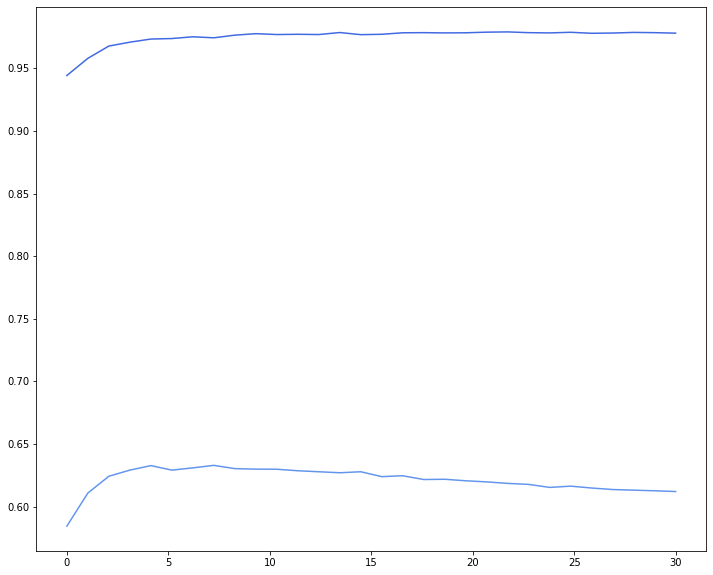

In [14]:
all_plotter(Adadelta_hyper_test, Adadelta_hyper_sparsity, Adadelta_hyper_selectivity_avg, 
            Adadelta_single_test, Adadelta_single_sparsity, Adadelta_single_selectivity_avg, 
            Adadelta_combined_test, Adadelta_combined_sparsity, Adadelta_combined_selectivity_avg)